In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [13]:
df = pd.read_csv("climate-risk-index.csv")

# Data understanding

In [14]:
df

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,177,178,NaN,NaN,Seychelles,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SYC,Seychelles
178,178,179,NaN,NaN,Gambia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,GMB,Gambia
179,179,180,NaN,NaN,Togo,131,114.33,104,0.01,102,1,123,0.0012,130,0.130,TGO,Togo
180,180,181,NaN,NaN,Trinidad and Tobago,135,124.50,114,0.00,114,0,135,NaN,135,0.000,TTO,Trinidad and Tobago


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      182 non-null    int64  
 1   cartodb_id                 182 non-null    int64  
 2   the_geom                   0 non-null      float64
 3   the_geom_webmercator       0 non-null      float64
 4   country                    182 non-null    object 
 5   cri_rank                   182 non-null    int64  
 6   cri_score                  182 non-null    float64
 7   fatalities_per_100k_rank   182 non-null    int64  
 8   fatalities_per_100k_total  182 non-null    float64
 9   fatalities_rank            182 non-null    int64  
 10  fatalities_total           182 non-null    int64  
 11  losses_per_gdp__rank       182 non-null    int64  
 12  losses_per_gdp__total      131 non-null    float64
 13  losses_usdm_ppp_rank       182 non-null    int64  

## Duplicates count

In [16]:
print('No. of duplicates in the dataset: {}'.format(sum(df.duplicated())))

No. of duplicates in the dataset: 0


## Null vals

In [17]:
print("We have {} Null values in the dataset".format(df.isnull().values.sum()))

We have 421 Null values in the dataset


### Drop Null columns and values

In [18]:
df = df.drop(columns=["the_geom", "the_geom_webmercator", "index", "cartodb_id"])
df = df.dropna()

## Ouliers

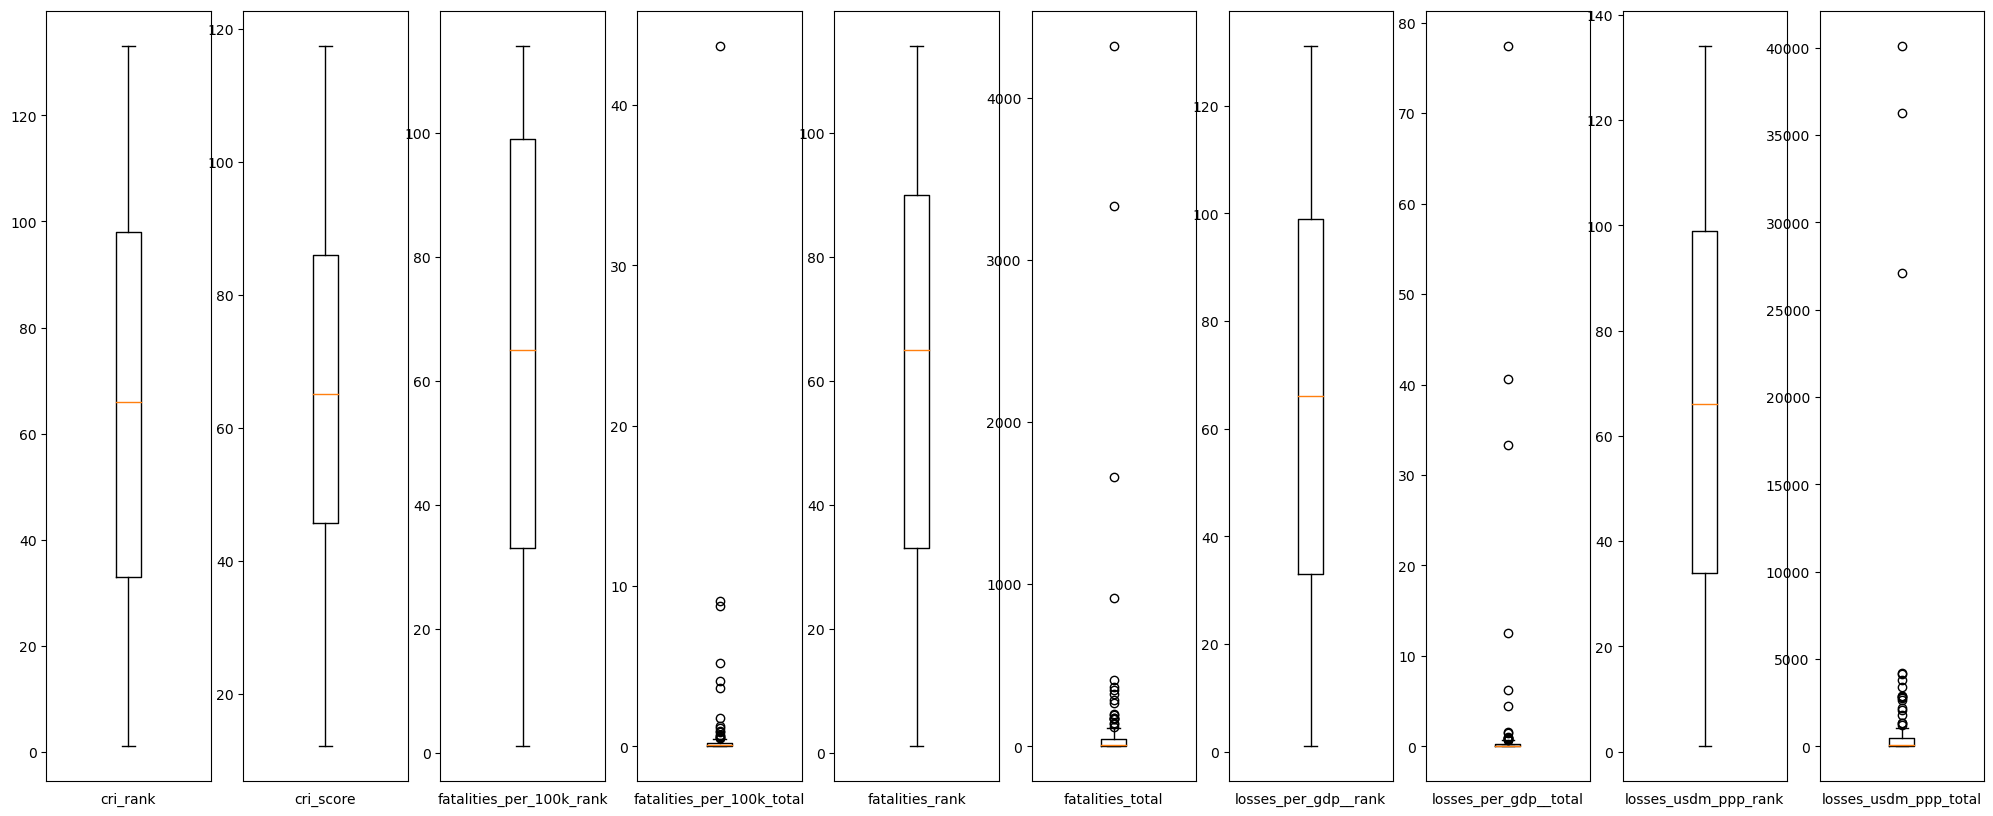

In [19]:
cols = [col for col in df.columns if col != 'country' and col != 'rw_country_code' and col != 'rw_country_name']
fig, ax = plt.subplots(1,len(cols), figsize=(25, 10))

for i, c in enumerate(cols):
    ax[i].boxplot(df[c])
    
    ax[i].set_xticks([])
    ax[i].set_xlabel(c, fontsize=10)

## Correlation

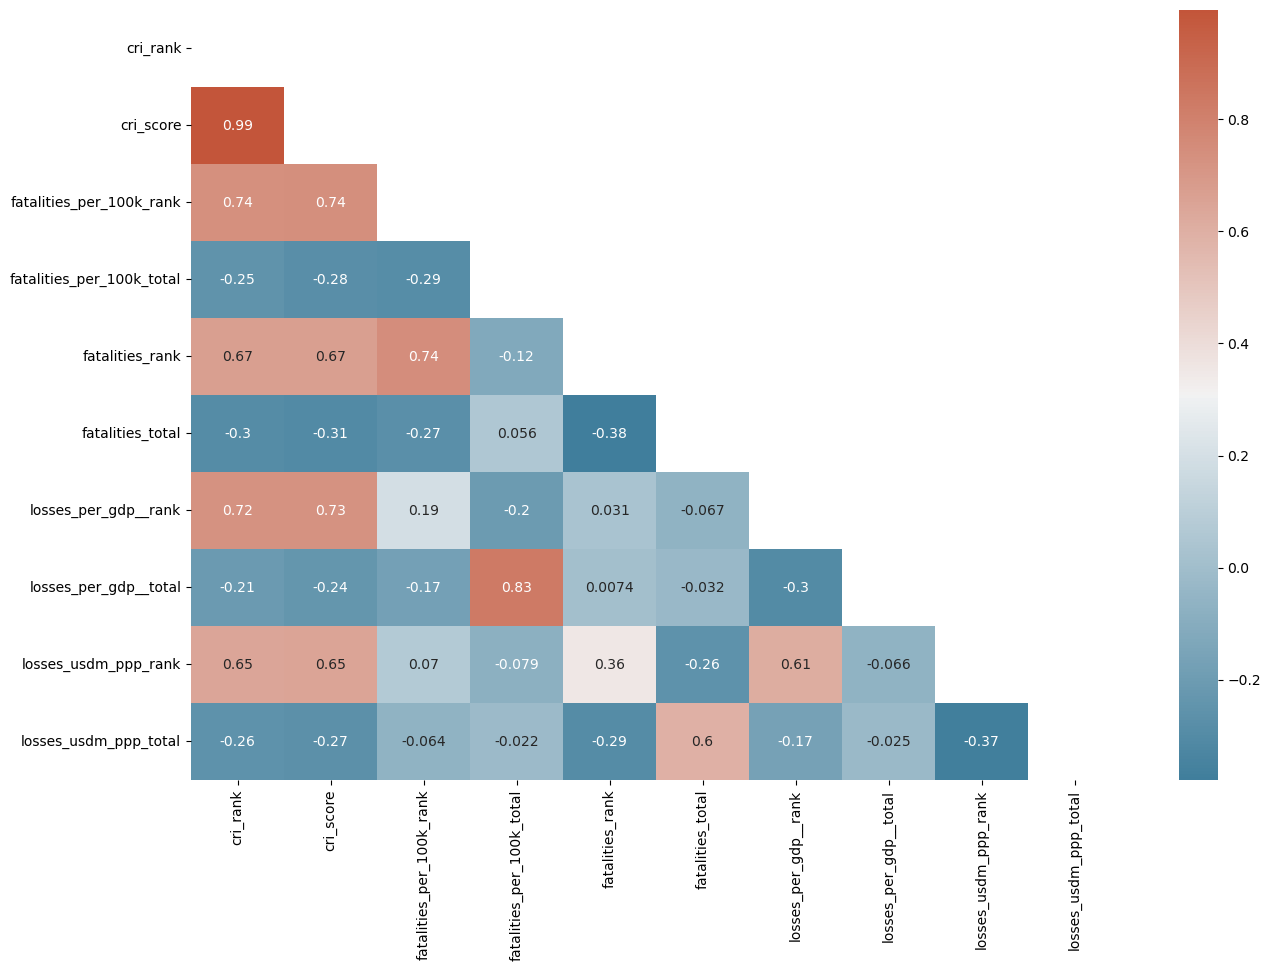

In [20]:
plt.figure(figsize=(15,10))
a = df.corr()
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(a, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(a, annot=True, mask = mask, cmap=cmap)
plt.show()